# **IRIS FLOWERS CLASSIFICATION ML PROJECT**

- This particular ML project is refered to as the "Hello World" of Machine Learning. It has five columns namely *Sepal Length*, *Sepal Width*, *Petal Length*, *Petal Width* and *Class*.

- We will be performing Supervised Machine Learning using the Support Vector Machine Algorithms

### **(1) Import the necessary libraries**

In [ ]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#for finding out the accuracy of the model
from sklearn import metrics

### **(2) Load the dataset**

In [ ]:
irdf=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=["sepal_length","sepal_width","petal_length","petal_width","class"])

### **(3) Introductory Insights**

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [ ]:
irdf.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
irdf.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
irdf.shape

(150, 5)

In [ ]:
irdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
irdf['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### **(4) Statistical Insights**

Obtain information about various statistical data, such as mean, standard deviation, maximum value, and minimum value

In [ ]:
irdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **(5) Data Cleaning**

Handling outliers, duplicates and missing values

#### **(5.1) Duplicates**

Checking for duplicate values

In [ ]:
irdf.duplicated().sum()

3

In [ ]:
dupes = irdf[irdf.duplicated(keep='first')]
 
print("Duplicate Rows :")

dupes

Duplicate Rows :


,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Removing duplicate values

In [ ]:
irdf.drop_duplicates(inplace=True)

In [ ]:
irdf.shape

(147, 5)

#### **(5.2) Outliers**

Checking for outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


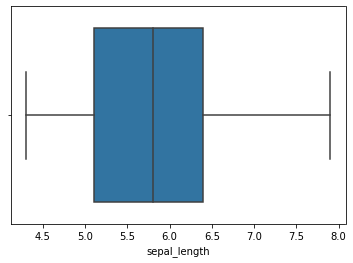

In [ ]:
sns.boxplot(irdf['sepal_length'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


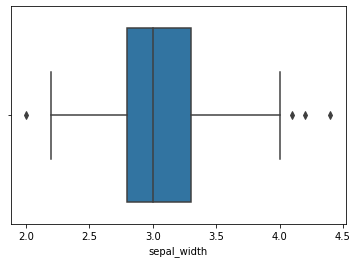

In [ ]:
sns.boxplot(irdf['sepal_width'])

From the above box-plot for "sepal width", we can see that there are 4 outliers, 3 values above the upper quartile and 1 value below the lower quartile.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


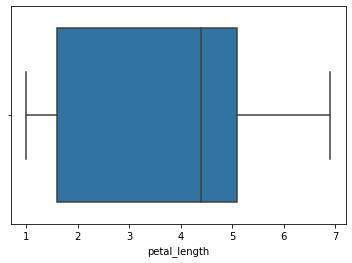

In [ ]:
sns.boxplot(irdf['petal_length'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


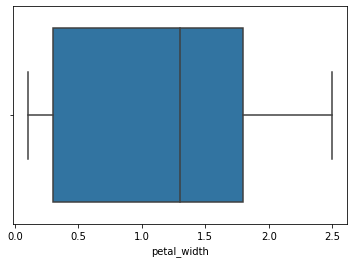

In [ ]:
sns.boxplot(irdf['petal_width'])

#### **(5.3) Missing values**

Checking for missing values

In [ ]:
irdf.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### **(6) Data Visualization**

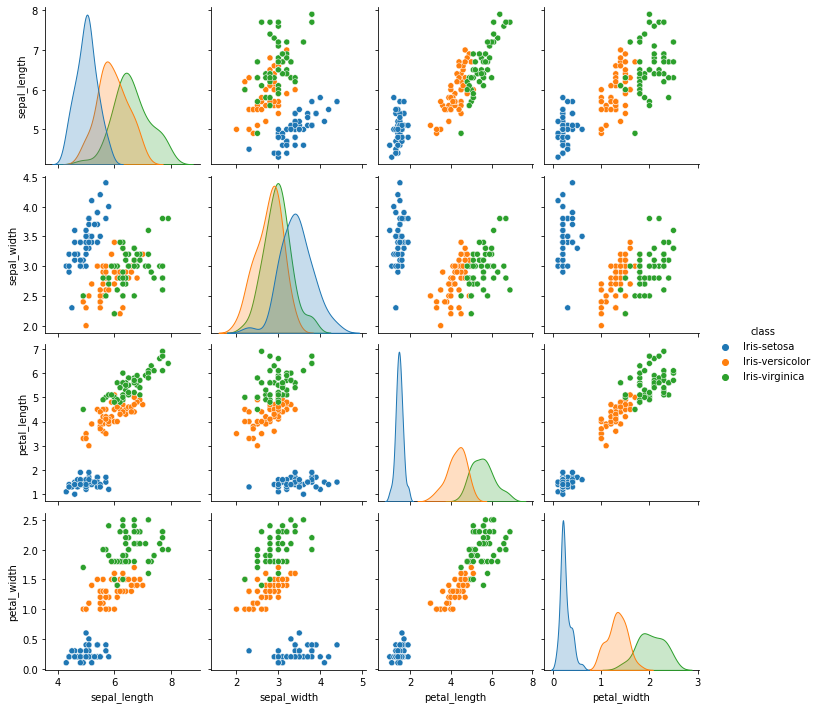

In [ ]:
# Visualize the whole dataset
sns.pairplot(irdf, hue='class')

### **(7) Data Modelling**

* Train-Test-Split 
* Fit the model to perform predictions
* Using the **Support Vector Machine(SVM)** Algorithm
  - works relatively well when there is a clear margin of separation between classes
  - relatively memory efficient

In [ ]:
x=irdf[['sepal_length','sepal_width','petal_length','petal_width']].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y=irdf['class']
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(102, 4)
(102,)
(45, 4)
(45,)


In [ ]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

### **(8) Prediction**

*x test values*

In [ ]:
d1=pd.DataFrame(x_test)
d1.columns=['sepal_length','sepal_width','petal_length','petal_width']
d1

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.6,0.2
1,4.6,3.4,1.4,0.3
2,4.6,3.1,1.5,0.2
3,4.4,3.2,1.3,0.2
4,5.0,3.5,1.6,0.6
5,5.9,3.2,4.8,1.8
6,6.0,2.9,4.5,1.5
7,5.7,4.4,1.5,0.4
8,6.7,3.3,5.7,2.5
9,6.5,3.2,5.1,2.0


*y test values*

In [ ]:
d2=pd.DataFrame(y_test)
d2.reset_index(inplace = True)
d2=d2.drop(['index'], axis=1)
d2

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-versicolor
6,Iris-versicolor
7,Iris-setosa
8,Iris-virginica
9,Iris-virginica


In [ ]:
y_pred=svm_model.predict(x_test)


*predicted class values*

In [ ]:
d3=pd.DataFrame(y_pred)
d3.columns=['predicted_class']
d3

,predicted_class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-virginica
6,Iris-versicolor
7,Iris-setosa
8,Iris-virginica
9,Iris-virginica


In [ ]:
res1=pd.merge(d1, d2, left_index=True, right_index=True)
res2=pd.merge(res1, d3, left_index=True, right_index=True)
#res2=res2.drop(['index'], axis=1)
res2

,sepal_length,sepal_width,petal_length,petal_width,class,predicted_class
0,5.0,3.0,1.6,0.2,Iris-setosa,Iris-setosa
1,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
3,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa
4,5.0,3.5,1.6,0.6,Iris-setosa,Iris-setosa
5,5.9,3.2,4.8,1.8,Iris-versicolor,Iris-virginica
6,6.0,2.9,4.5,1.5,Iris-versicolor,Iris-versicolor
7,5.7,4.4,1.5,0.4,Iris-setosa,Iris-setosa
8,6.7,3.3,5.7,2.5,Iris-virginica,Iris-virginica
9,6.5,3.2,5.1,2.0,Iris-virginica,Iris-virginica


### **(9) Evaluation**

In [ ]:
print("Accuracy of the SVM Model:", metrics.accuracy_score(y_test,y_pred))


Accuracy of the SVM Model: 0.9777777777777777


### **(10) Testing the Model**

- Take user input and predict the output

In [ ]:
#X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1 ], [5.3, 2.5, 4.6, 1.9 ]])
inp = []

inp_len = int(input('Enter the number of sets you want to predict the class of : '))

for val in range(inp_len):
    print('\nSet ', val+1, ': ')
    ele = [float(input('sepal_length : ')), float(input('sepal_width : ')), float(input('petal_length : ')),float(input('petal_width : '))]
    inp.append(ele)
    

X_new = np.array(inp)

#Prediction of the species from the input vector
Y_pred = svm_model.predict(X_new)

print('\nPredicted Class: ')
for ans in range(inp_len):
  print('Set ', ans+1, ': ', Y_pred[ans])


Enter the number of sets you want to predict the class of : 1

Set  1 : 
sepal_length : 2.4
sepal_width : 3.1
petal_length : 2.7
petal_width : 3.0

Predicted Class: 
Set  1 :  Iris-versicolor


In [ ]:
d4=pd.DataFrame(X_new)
d4.columns=['sepal_length','sepal_width','petal_length','petal_width']
d4

,sepal_length,sepal_width,petal_length,petal_width
0,2.4,3.1,2.7,3.0


In [ ]:
d5=pd.DataFrame(Y_pred)
d5.columns=['class']
d5

,class
0,Iris-versicolor


In [ ]:
res3=pd.merge(d4, d5, left_index=True, right_index=True)
res3

,sepal_length,sepal_width,petal_length,petal_width,class
0,2.4,3.1,2.7,3.0,Iris-versicolor
